# Project 8 -- Lukas Anell

## Question 1

In [8]:
library(lubridate)
orders <- read.csv("/anvil/projects/tdm/data/restaurant/orders.csv")
head(orders)

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID.X.LOC_NUM.X.VENDOR
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,163238,92PEE24,1,7.6,2,,0,NA,,No,...,,,,,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,,92PEE24 X 0 X 105
2,163240,QS68UD8,1,8.7,1,,0,NA,,No,...,,,,,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
3,163241,MB7VY5F,2,14.4,1,,0,NA,,No,...,,,,,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,,MB7VY5F X 0 X 83
4,163244,KDJ951Y,1,7.1,1,,0,NA,,No,...,,,,,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
5,163245,BAL0RVT,4,27.2,1,,0,NA,,No,...,,,,,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
6,163246,U263OCD,3,18.2,2,,0,NA,,No,...,,,,,2019-07-31 05:30:00,83,2019-08-01 05:37:05,0,Work,U263OCD X 0 X 83


In [9]:
class(orders$created_at)

[1] "character"

In [10]:
orders$created_at <- as.Date(orders$created_at)
str(orders$created_at)

 Date[1:135303], format: "2019-08-01" "2019-08-01" "2019-08-01" "2019-08-01" "2019-08-01" ...


In [11]:
orders$num_day_of_the_week <- wday(orders$created_at)
orders$day_of_the_week <- wday(orders$created_at, label = TRUE)
table(orders$num_day_of_the_week)
table(orders$day_of_the_week)


    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 


  Sun   Mon   Tue   Wed   Thu   Fri   Sat 
18651 19676 22003 20619 22210 15906 16238 

In [12]:
class(orders$created_at)

[1] "Date"

I know the instructions mentioned that a lot of the columns aren't filled out, but I can't help but think that if this was real life data it would be very annoying to retroactively go back and add stuff to the existing rows. I think if I was creating a database, I would make sure this didn't happen.
I like that `str()` gives you the datatype of the column, it helped a lot with checking if `as.Date()` worked correctly.
I'm not 100% sure what the third deliverable is asking, but maybe it's asking what the original dates were stored as in the created_at column? I think that makes sense. I actually just saw that there's a video at the bottom saying that if I used `fread()` instead of `read.csv()`, the datatype would be `POSIXct` or `POSIXt`. I find it interesting that it's different depending on what function I use.

1.1: `lubridate` seems to give functions to easily work with dates and times. For instance, in the code from the instructions, we were able to take the created_at column and sort each date in it to which day of the week it was in super easily, and then display how many entries each day of the week had. Overall, it seems like it just makes it a lot easier to do computations on data related to dates. 

1.2: See line 15.

1.3: The original date-time data was stored as `character`

## Question 2

In [52]:
orders$month <- month(orders$created_at, label=TRUE)
orders$year <- year(orders$created_at)

In [53]:
table(orders$month) # shows there's no entries with Mar or Apr


  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
17825 23683     0     0     1 10120 10175  8933  6609 19893 18249 19815 

In [54]:
table(orders$year)


 2019  2020 
93795 41508 

In [55]:
monthly_totals <- tapply(orders$item_count, orders$month, sum, na.rm = TRUE)
monthly_totals

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
40410 51197    NA    NA     0 27839 27296 23853 16098 31527 43102 47479

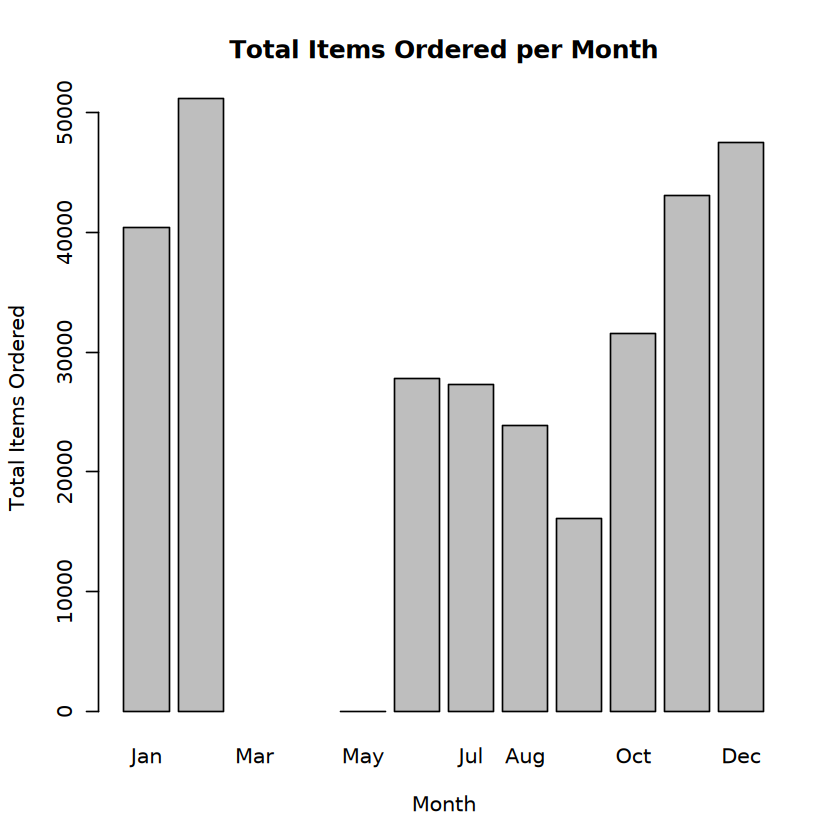

In [56]:
barplot(
    monthly_totals,
    main = "Total Items Ordered per Month",
    xlab = "Month",
    ylab = "Total Items Ordered",
)

In [57]:
year_month_totals <- tapply(
    orders$item_count,
    list(Year = orders$year, Month = orders$month),
    sum,
    na.rm = TRUE
)
year_month_totals

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,NA,NA,NA,NA,0,27839,27296,23853,16098,31527,43102,47479
2020,40410,51197,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


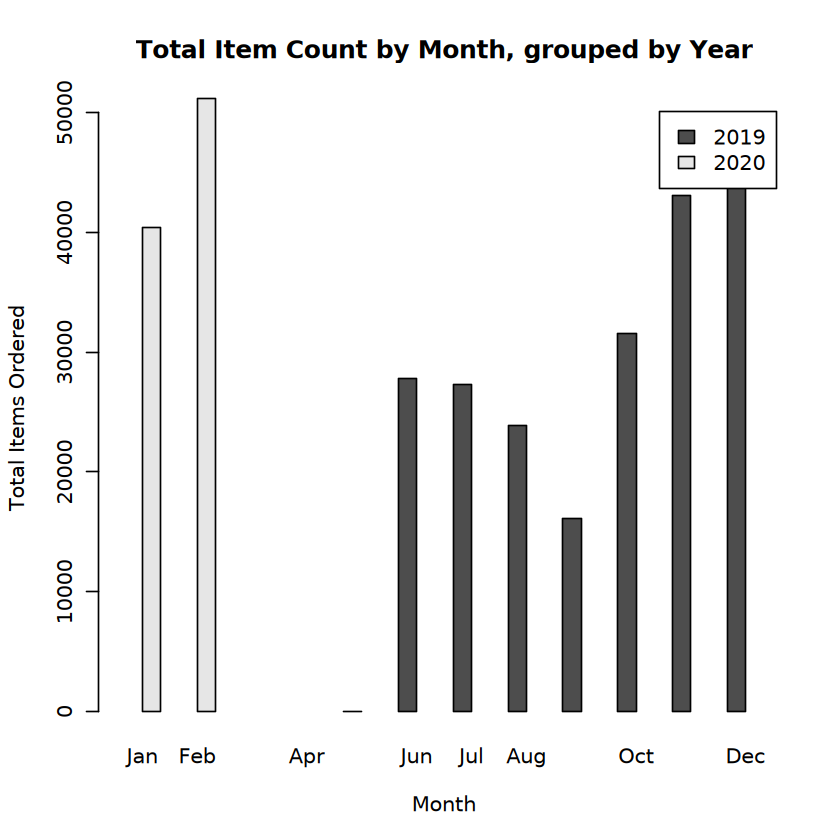

In [58]:
barplot(
    year_month_totals,
    beside = TRUE,
    legend = TRUE,
    main = "Total Item Count by Month, grouped by Year",
    xlab = "Month",
    ylab = "Total Items Ordered",
) 

I noticed that in the month column, March and April both had values of 0, but May had a value of 1. However, when doing the `tapply()`, March and April became N/A, while May became just 0. I'm curious what the one entry for May was, like if it was just 0 items ordered, and that's why it came out differently than the other two months. The barplot also looks weird because of it, but I feel like I should leave it to show the difference between no entries and no items ordered (if that is what's making the difference).
For the second barplot also looks weird in my opinion, especially with the 2020 data being put before the 2019 data, but I'm not sure how else I would show it or how to change the order.

2.1: The actual timespan seems to be June 2019 - Feburary 2020 according to the table in line 42.

2.2: I think my theory was correcy, that March and April simply do not show up in the table at all, which is why they ended up with N/A values. On the other hand, May did show up in the table, just with a value of 0 items ordered, which is why they showed up differently.

2.3: See line 57 or line 53.

## Question 3

In [59]:
flights <- read.csv("/anvil/projects/tdm/data/flights/subset/1997.csv")

In [61]:
dim(flights)
head(flights)

[1] 5411843      29

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1997,1,28,2,1615,1615,1728,1725,WN,1159,...,4,9,0,NA,0,NA,NA,NA,NA,NA
2,1997,1,29,3,1624,1615,1735,1725,WN,1159,...,4,11,0,NA,0,NA,NA,NA,NA,NA
3,1997,1,30,4,1626,1615,1730,1725,WN,1159,...,2,10,0,NA,0,NA,NA,NA,NA,NA
4,1997,1,31,5,1628,1615,1729,1725,WN,1159,...,4,7,0,NA,0,NA,NA,NA,NA,NA
5,1997,1,14,2,1503,1425,1619,1535,WN,1221,...,4,8,0,NA,0,NA,NA,NA,NA,NA
6,1997,1,1,3,1029,1020,1127,1130,WN,1293,...,2,4,0,NA,0,NA,NA,NA,NA,NA


In [64]:
flights$full_dates <- ymd(paste(flights$Year, flights$Month, flights$DayofMonth, sep = "-"))
class(flights$full_dates)
head(flights$full_dates)

[1] "Date"

[1] "1997-01-28" "1997-01-29" "1997-01-30" "1997-01-31" "1997-01-14"
[6] "1997-01-01"

In [77]:
flights$DepTime[flights$DepTime == 2400] <- 0

flights$depHour <- floor(flights$DepTime / 100)
flights$depMinute <- flights$DepTime - flights$depHour * 100

In [73]:
flights$date_times <- make_datetime(
    year = flights$Year,
    month = flights$Month,
    day = flights$DayofMonth,
    hour = flights$depHour,
    min = flights$depMinute
)
head(flights$date_times)

[1] "1997-01-28 16:15:00 UTC" "1997-01-29 16:24:00 UTC"
[3] "1997-01-30 16:26:00 UTC" "1997-01-31 16:28:00 UTC"
[5] "1997-01-14 15:03:00 UTC" "1997-01-01 10:29:00 UTC"

In [78]:
head(flights)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,full_dates,depHour,depMinute,date_times
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dttm>
1,1997,1,28,2,1615,1615,1728,1725,WN,1159,...,0,NA,NA,NA,NA,NA,1997-01-28,16,15,1997-01-28 16:15:00
2,1997,1,29,3,1624,1615,1735,1725,WN,1159,...,0,NA,NA,NA,NA,NA,1997-01-29,16,24,1997-01-29 16:24:00
3,1997,1,30,4,1626,1615,1730,1725,WN,1159,...,0,NA,NA,NA,NA,NA,1997-01-30,16,26,1997-01-30 16:26:00
4,1997,1,31,5,1628,1615,1729,1725,WN,1159,...,0,NA,NA,NA,NA,NA,1997-01-31,16,28,1997-01-31 16:28:00
5,1997,1,14,2,1503,1425,1619,1535,WN,1221,...,0,NA,NA,NA,NA,NA,1997-01-14,15,3,1997-01-14 15:03:00
6,1997,1,1,3,1029,1020,1127,1130,WN,1293,...,0,NA,NA,NA,NA,NA,1997-01-01,10,29,1997-01-01 10:29:00


I didn't know how to use `make_datetime()` initially, so I look up the [documentation](https://rdrr.io/cran/lubridate/man/make_datetime.html) for it, and that helped a lot.

3.1: See line 78, last column.

3.2: See line 78, third to last and second to last columns.

3.3: Based on the previous instructions, `ymd()` is used to create a `date` object based on inputs given by the user in the format YYYY-MM-DD. It stands for year-month-day.

## Question 4

In [80]:
bostonDF <- subset(flights, Origin == "BOS")
head(bostonDF)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,full_dates,depHour,depMinute,date_times
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<date>,<dbl>,<dbl>,<dttm>
708,1997,1,1,3,727,700,1044,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-01,7,27,1997-01-01 07:27:00
709,1997,1,2,4,700,700,1052,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-02,7,0,1997-01-02 07:00:00
710,1997,1,3,5,658,700,1136,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-03,6,58,1997-01-03 06:58:00
711,1997,1,4,6,700,700,1053,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-04,7,0,1997-01-04 07:00:00
712,1997,1,5,7,700,700,1052,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-05,7,0,1997-01-05 07:00:00
713,1997,1,6,1,702,700,1112,1033,HP,87,...,0,NA,NA,NA,NA,NA,1997-01-06,7,2,1997-01-06 07:02:00


In [133]:
boston_distance <- tapply(
    bostonDF$Distance,
    factor(bostonDF$Month, levels = 1:12, labels = month.abb),
    mean,
    na.rm = TRUE
)
boston_distance

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug 
899.6992 893.6625 893.5846 895.0188 895.6018 886.2921 889.2248 892.8358 
     Sep      Oct      Nov      Dec 
882.7238 881.4267 887.8971 895.0592

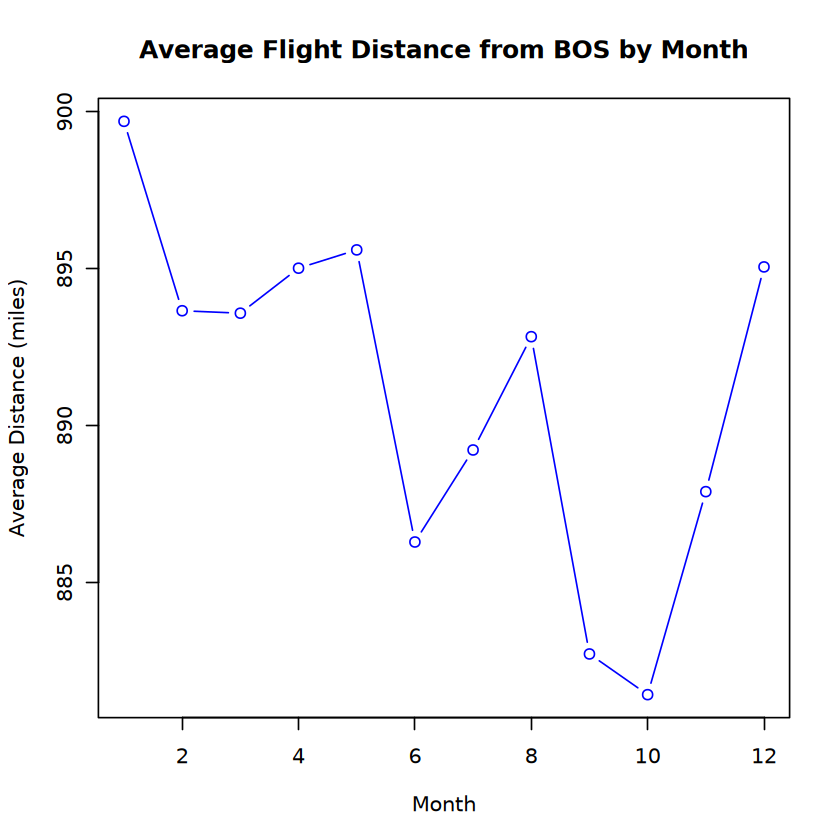

In [135]:
plot(
    boston_distance,
    type = "b",
    col = "blue",
    main = "Average Flight Distance from BOS by Month",
    xlab = "Month",
    ylab = "Average Distance (miles)"
)

In [136]:
phoenixDF <- subset(flights, Origin == "PHX")
chicagoDF <- subset(flights, Origin == "MDW")
seattleDF <- subset(flights, Origin == "SEA")

phoenix_distance <- tapply(
    phoenixDF$Distance,
    factor(phoenixDF$Month, levels = 1:12, labels = month.abb),
    mean,
    na.rm = TRUE
)

chicago_distance <- tapply(
    chicagoDF$Distance,
    factor(chicagoDF$Month, levels = 1:12, labels = month.abb),
    mean,
    na.rm = TRUE
)

seattle_distance <- tapply(
    seattleDF$Distance,
    factor(seattleDF$Month, levels = 1:12, labels = month.abb),
    mean,
    na.rm = TRUE
)

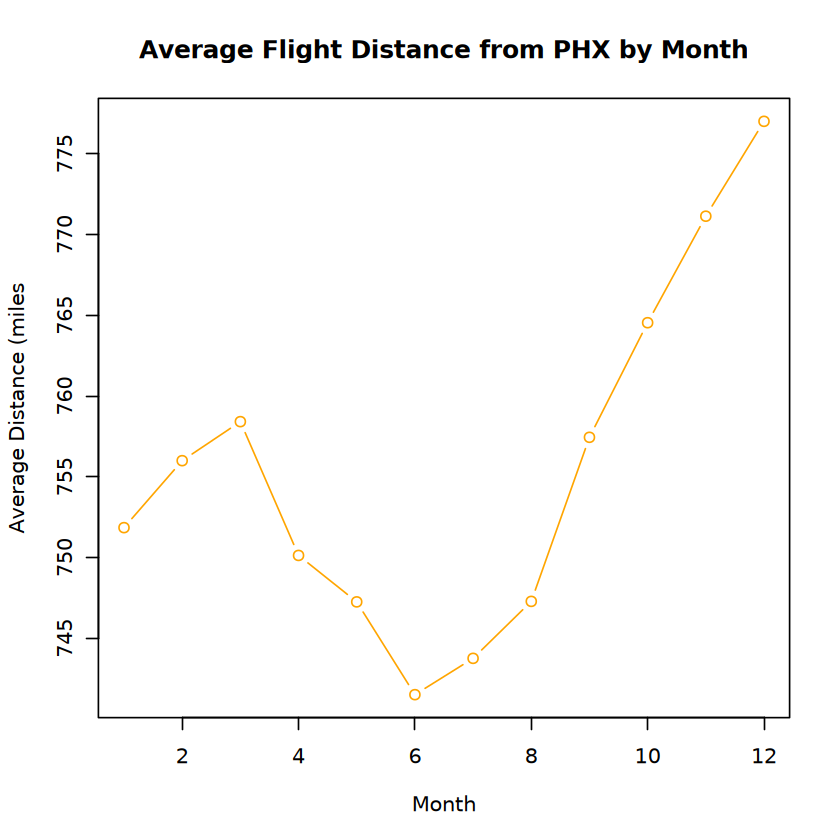

In [137]:
plot(
    phoenix_distance,
    type = "b",
    col = "orange",
    main = "Average Flight Distance from PHX by Month",
    xlab = "Month",
    ylab = "Average Distance (miles"
)

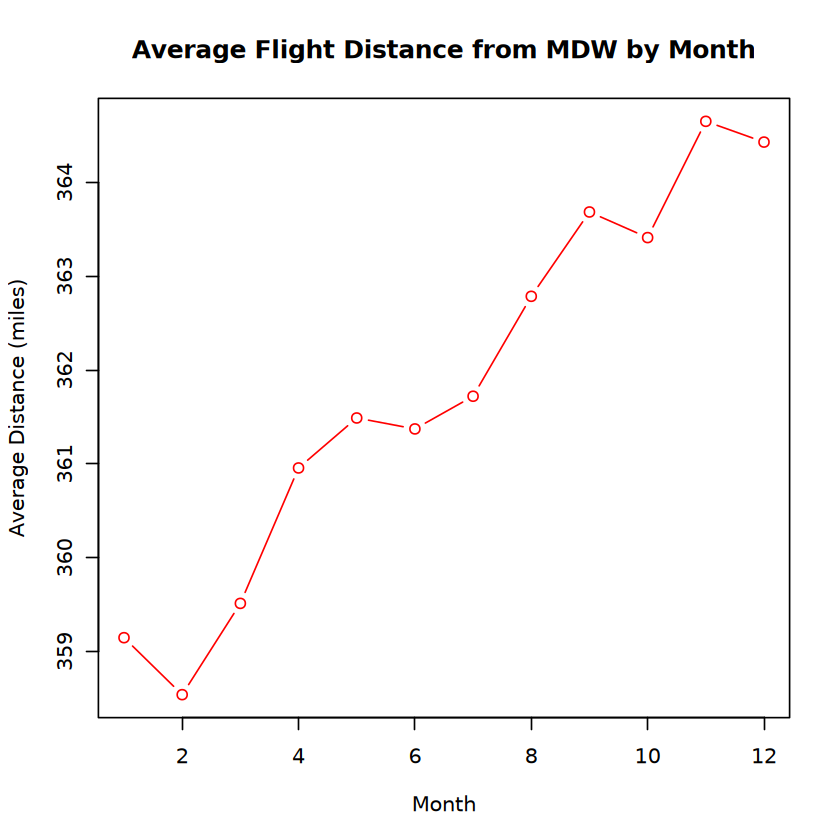

In [138]:
plot(
    chicago_distance,
    type = "b",
    col = "red",
    main = "Average Flight Distance from MDW by Month",
    xlab = "Month",
    ylab = "Average Distance (miles)"
)

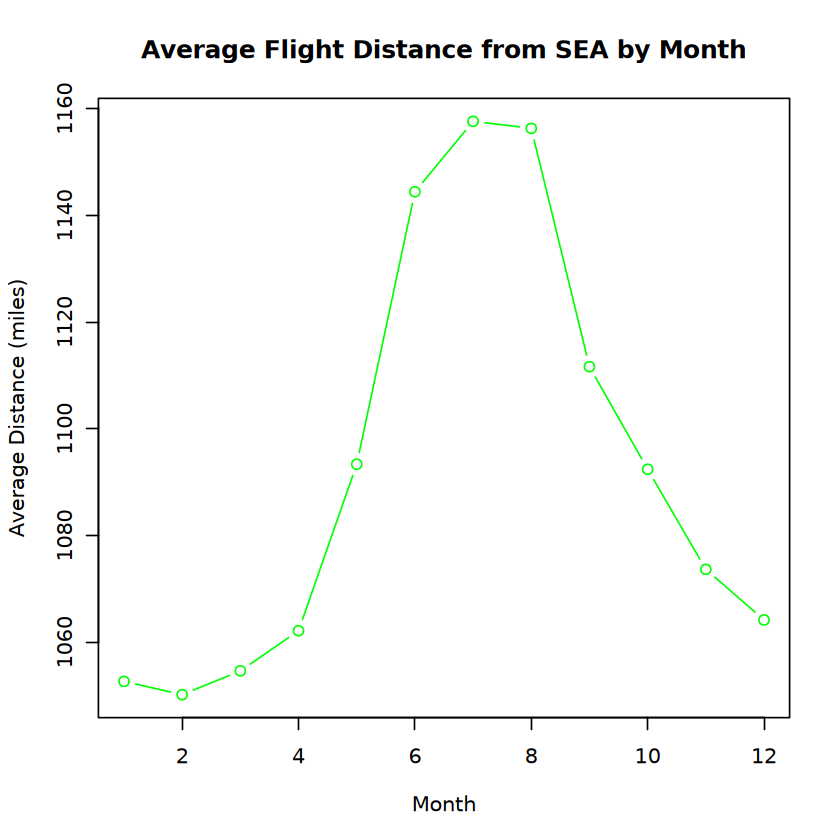

In [139]:
plot(
    seattle_distance,
    type = "b",
    col = "green",
    main = "Average Flight Distance from SEA by Month",
    xlab = "Month",
    ylab = "Average Distance (miles)"
)

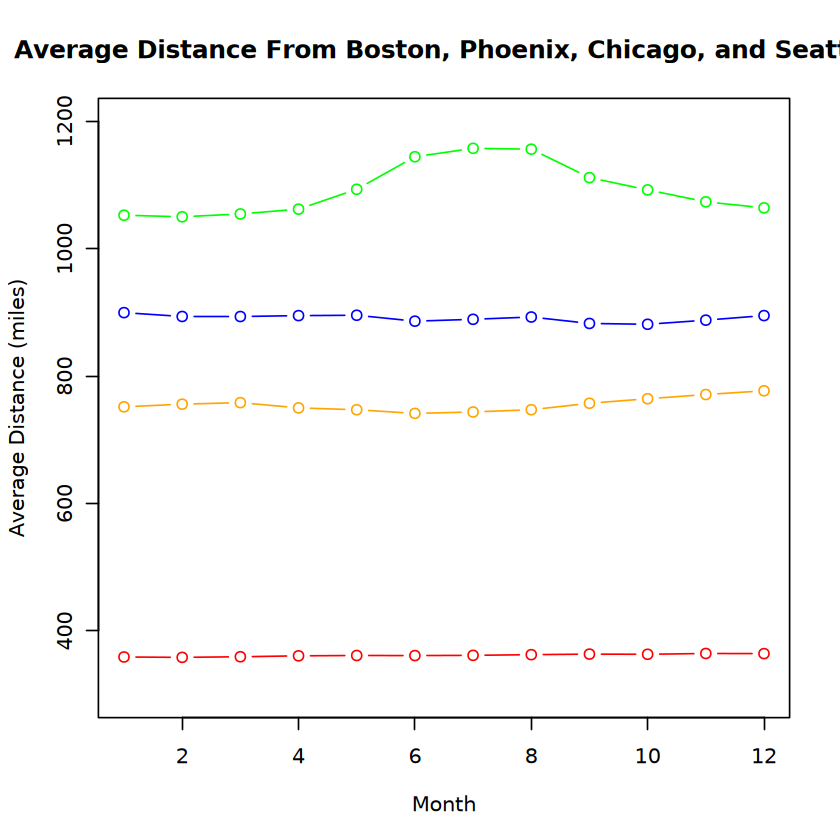

In [143]:
plot(
    boston_distance,
    type = "b",
    col = "blue",
    ylim = c(300, 1200),
    main = "Average Distance From Boston, Phoenix, Chicago, and Seattle",
    xlab = "Month",
    ylab = "Average Distance (miles)",
)

lines(phoenix_distance, type = "b", col = "orange")
lines(chicago_distance, type = "b", col = "red")
lines(seattle_distance, type = "b", col = "green")
# boston is blue

I think I should've created a function to do the `tapply()` work and maybe the plotting too, because I pretty much copy-pasted the same thing 4 times. I will do that next time.
It's interesting to think about why certain cities have spikes or dips in certain months, other than holidays.

4.1: In October, Seattle had the greatest average flight distance, followed by Boston, then Phoenix, and Chicago way at the bottom.

4.2: See the plots above.

4.3: I think the biggest factor playing into the difference in average distance is mostly how far away these airports are from the center of the US. For instance, Seattle always has the biggest average distance, because it's on the edge of the west coast, so anyone flying there would have to travel further, bringing up the average. Boston is on the east coast, which explains its higher average distance, but it's also very close to many major cities, so more people traveling will not have to travel as far as Seattle. Phoenix is also closer to the west coast, which is why it also has a higher average distance, while chicago is almost directly in the middle of the U.S., so everyone traveling there would probably travel the same amount, making the average lower.

## Question 5

In [153]:
boston_total_distance  <- tapply(
    bostonDF$Distance,
    factor(bostonDF$Month, levels = 1:12, labels = month.abb),
    sum,
    na.rm = TRUE
)

phoenix_total_distance <- tapply(
    phoenixDF$Distance,
    factor(phoenixDF$Month, levels = 1:12, labels = month.abb),
    sum,
    na.rm = TRUE
)

chicago_total_distance <- tapply(
    chicagoDF$Distance,
    factor(chicagoDF$Month, levels = 1:12, labels = month.abb),
    sum,
    na.rm = TRUE
)

seattle_total_distance <- tapply(
    seattleDF$Distance,
    factor(seattleDF$Month, levels = 1:12, labels = month.abb),
    sum,
    na.rm = TRUE
)

boston_total_distance
phoenix_total_distance
chicago_total_distance
seattle_total_distance

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct 
7441412 6587186 7418539 7323044 7413792 7325204 7602872 7592676 7245397 7505348 
    Nov     Dec 
6970880 7134517

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug 
10562012  9713066 10882496 10359314 10551242 10076382 10435682 10443325 
     Sep      Oct      Nov      Dec 
10414872 11000203 10649386 11112787

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct 
1332798 1199319 1315460 1290059 1336787 1333826 1379242 1379674 1355815 1402768 
    Nov     Dec 
1304719 1350939

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug 
 8046435  7278639  8175388  8108407  8923976  9941597 10996256 11072807 
     Sep      Oct      Nov      Dec 
 9251033  8940213  8009410  8302618

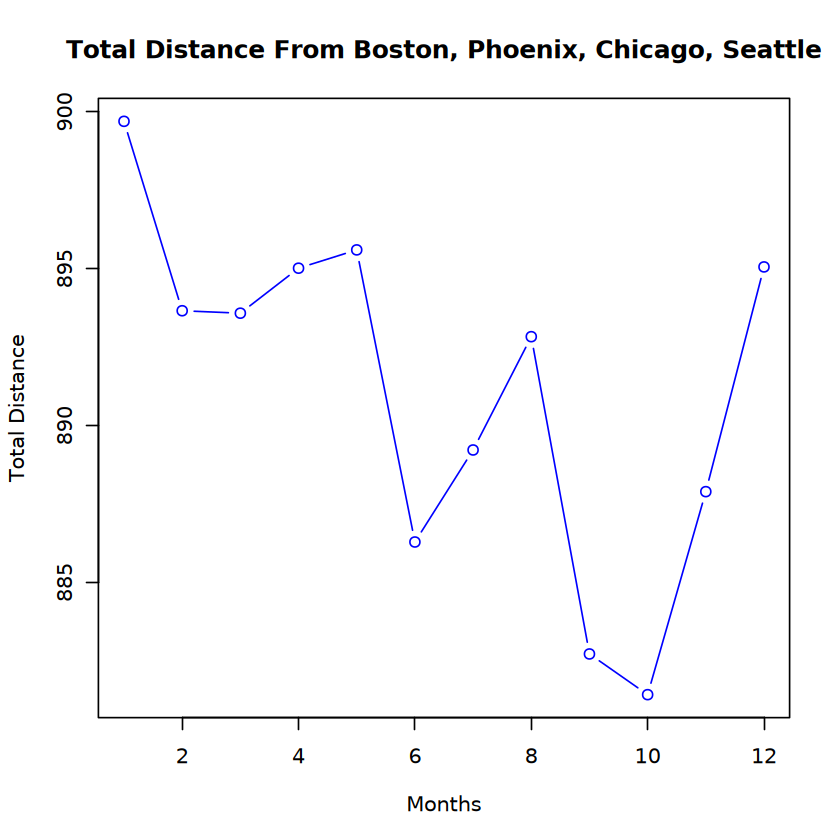

In [154]:
plot(
    boston_distance,
    type='b',
    col='blue',
    main='Total Distance From Boston, Phoenix, Chicago, Seattle',
    xlab='Months',
    ylab='Total Distance'
)

lines(
    phoenix_distance,
    type='b',
    col='orange'
)
lines(
    chicago_distance,
    type='b',
    col='red'
)
lines(
    seattle_distance,
    type='b',
    col='green'
)

In [155]:
min_all_flights <- min(c(boston_total_distance, phoenix_total_distance, chicago_total_distance, seattle_total_distance))
max_all_flights <- max(c(boston_total_distance, phoenix_total_distance, chicago_total_distance, seattle_total_distance))

min_all_flights
max_all_flights

[1] 1199319

[1] 11112787

In [156]:
ylim_lower <- min_all_flights * 0.95
ylim_upper <- max_all_flights * 1.05

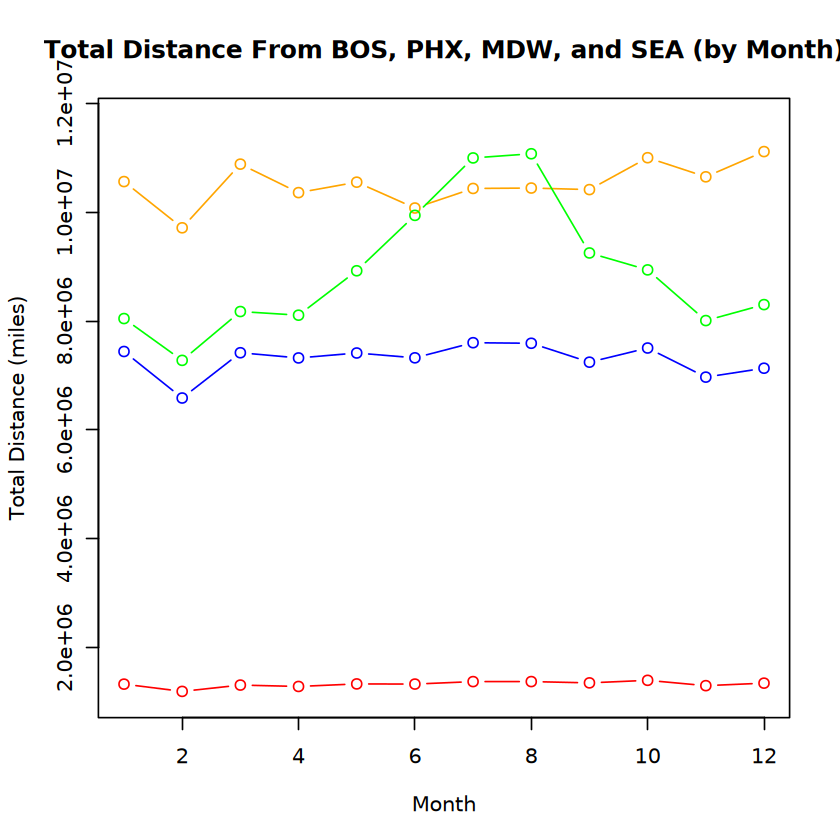

In [157]:
plot(
    boston_total_distance,
    type = "b",
    col = "blue",
    ylim = c(ylim_lower, ylim_upper),
    main = "Total Distance From BOS, PHX, MDW, and SEA (by Month)",
    xlab = "Month",
    ylab = "Total Distance (miles)",
)

lines(phoenix_total_distance, type = "b", col = "orange")
lines(chicago_total_distance, type = "b", col = "red")
lines(seattle_total_distance, type = "b", col = "green")

I'm sure we've used it before, but `c()` is such a useful function for combining data together, like when I was finding the min and max.

5.1: See line 145.

5.2: The maximum was 11112787 miles, and the minimum 1199319 miles. This is of the total over the entire year.

5.3: See line 157.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
